In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_year3= pd.read_excel('3__year.xlsx')

In [ ]:
df_year3

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,b'1'
10499,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,b'1'
10500,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,b'1'
10501,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,b'1'


In [ ]:
# Converted all features to numeric (invalid strings become NaN)
# Excluded the target column from this step
feature_cols = df_year3.columns[:-1]  # assuming last column is 'class'
df_year3[feature_cols] = df_year3[feature_cols].apply(pd.to_numeric, errors='coerce')

#  Clean the target column: convert from bytes (e.g., b'0') to integer
df_year3['class'] = df_year3['class'].astype(str).str.extract(r'(\d)').astype(int)

In [ ]:
# Separated features and target
X = df_year3.iloc[:, :-1]  # first 64 columns (financial features)
y = df_year3.iloc[:, -1]   # last column ('class')

In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

In [ ]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
import shap


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_lr = []
cm_lr=[]
roc_lr = {}
shap_values_lr = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (bankrupt)


        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_lr.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_lr[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))


        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_lr = pd.DataFrame(results_lr)

# Round for readability
results_df_lr = results_df_lr.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8915,0.1854,0.3838,0.9166,0.2500,0.7285
1,BorderlineSMOTE,0.8829,0.1674,0.3737,0.9081,0.2312,0.7213
2,ADASYN,0.8962,0.1885,0.3636,0.9226,0.2483,0.7312
3,SVMSMOTE,0.8724,0.1633,0.4141,0.8951,0.2343,0.7240
4,SMOTEENN,0.8529,0.1477,0.4444,0.8731,0.2217,0.7407
5,SMOTETomek,0.8915,0.1854,0.3838,0.9166,0.2500,0.7284


SMOTE


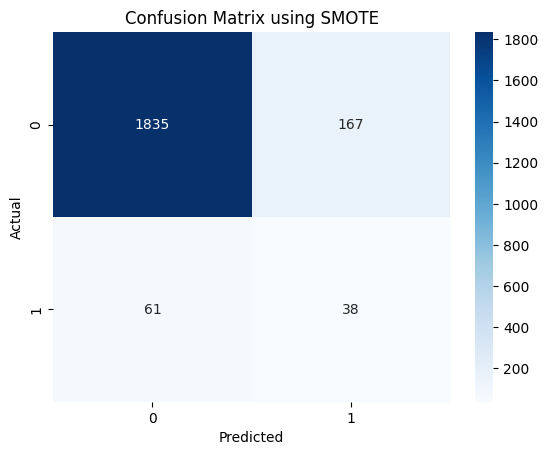

BorderlineSMOTE


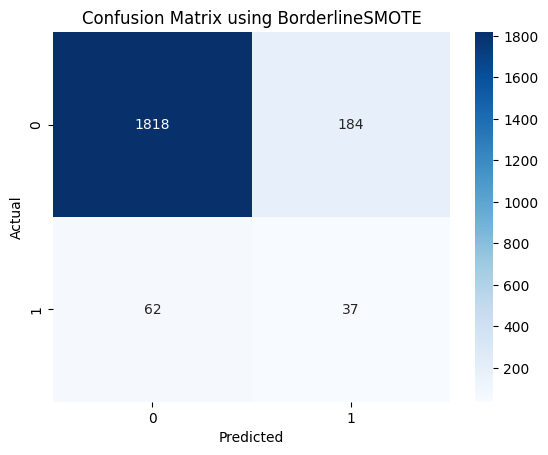

ADASYN


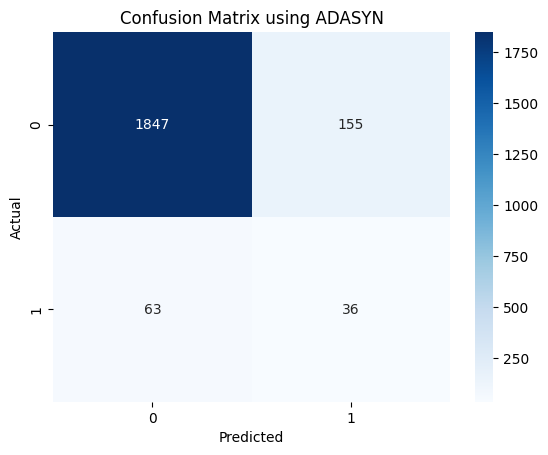

SVMSMOTE


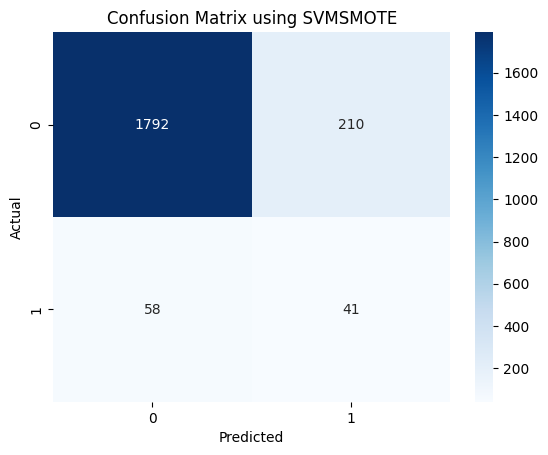

SMOTEENN


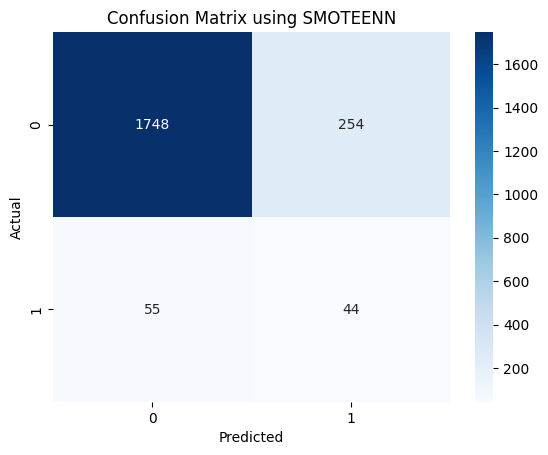

SMOTETomek


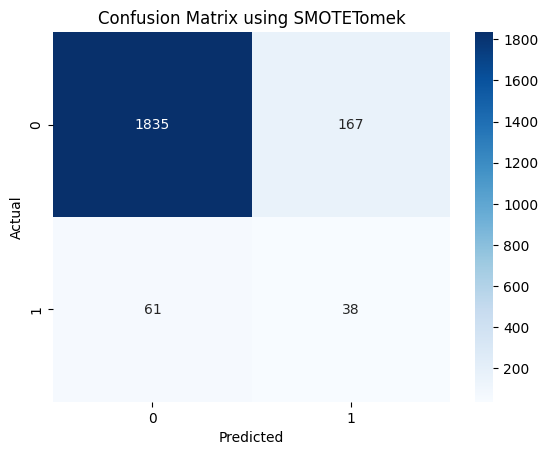

In [ ]:
#confusion matrix plot
for x in cm_lr:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

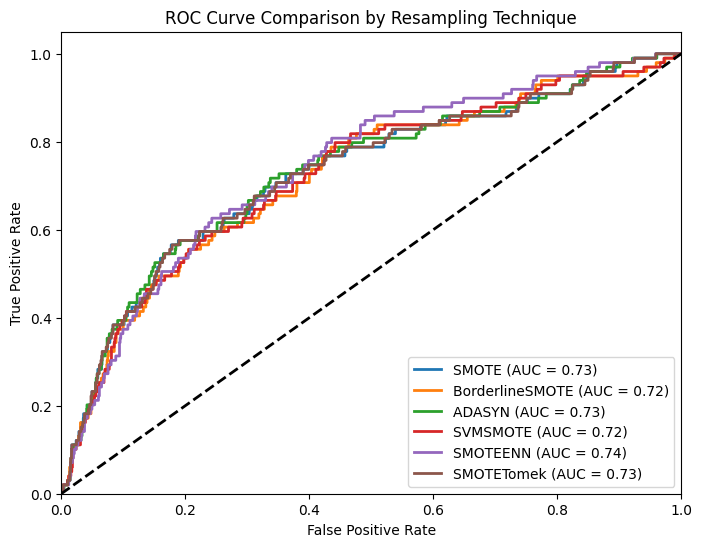

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_lr.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_svm = []
cm_svm=[]
roc_svm = {}
shap_values_svm = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', SVC(class_weight='balanced', kernel='rbf', C=.1, probability=True, random_state=42))])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]



        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_svm.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_svm.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_svm[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(pipeline)
        shap_values = explainer.shap_values(X_test)
        shap_values_svm.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_svm = pd.DataFrame(results_svm)

# Round for readability
results_df_svm = results_df_svm.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_svm)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.5992,0.0849,0.7677,0.5909,0.1529,0.7254
1,BorderlineSMOTE,0.6806,0.0960,0.6869,0.6803,0.1685,0.7141
2,ADASYN,0.6059,0.0825,0.7273,0.5999,0.1481,0.7269
3,SVMSMOTE,0.6863,0.0965,0.6768,0.6868,0.1690,0.7144
4,SMOTEENN,0.5726,0.0799,0.7677,0.5629,0.1448,0.7225
5,SMOTETomek,0.5988,0.0848,0.7677,0.5904,0.1528,0.7249


SMOTE


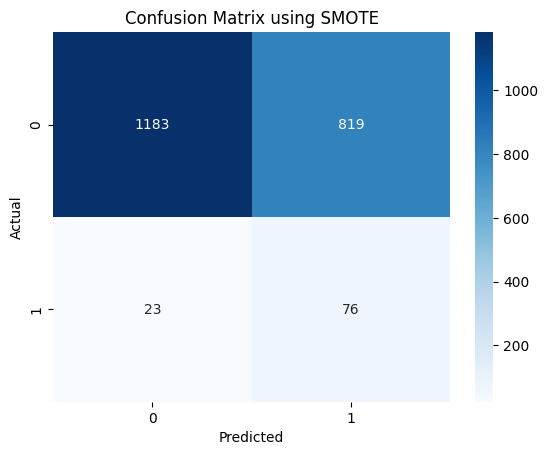

BorderlineSMOTE


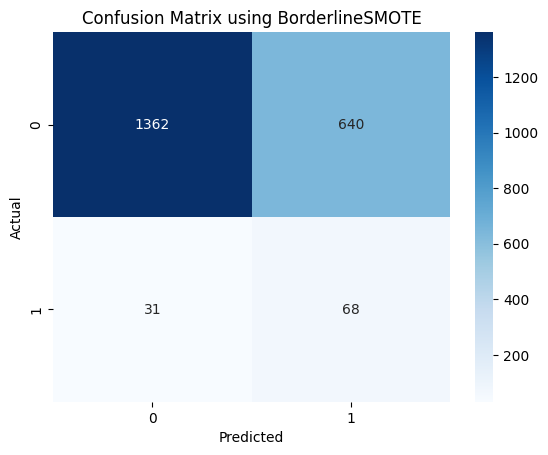

ADASYN


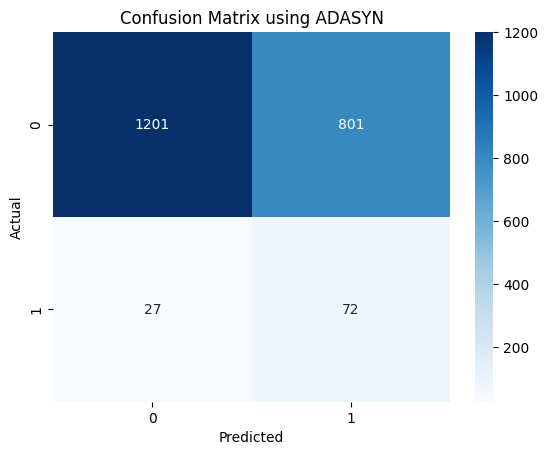

SVMSMOTE


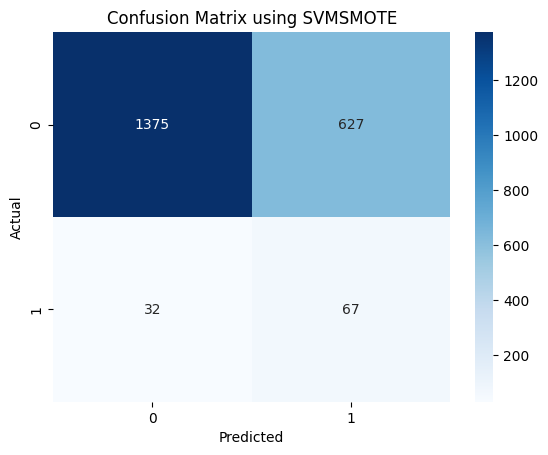

SMOTEENN


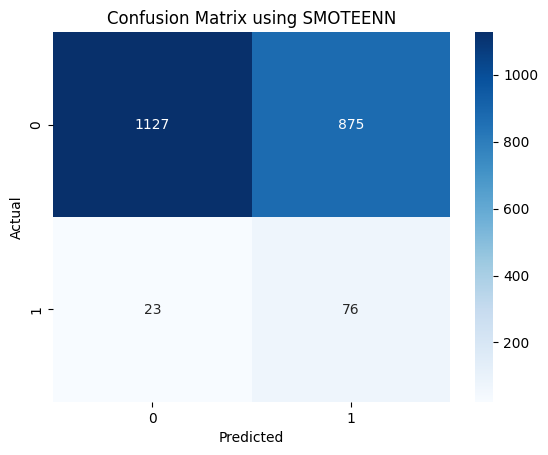

SMOTETomek


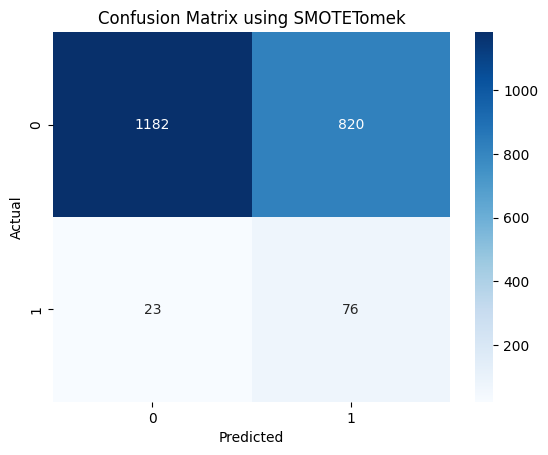

In [ ]:
#confusion matrix plot
for x in cm_svm:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

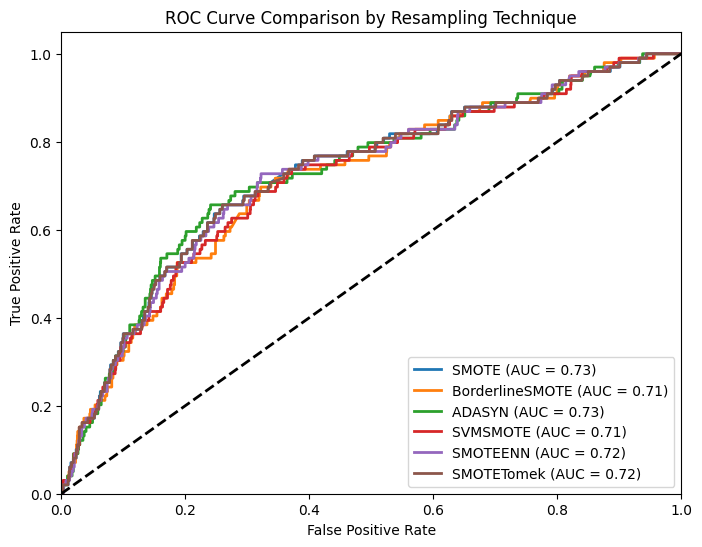

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_svm.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_rf = []
cm_rf=[]
roc_rf = {}
shap_values_rf = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = RandomForestClassifier(class_weight="balanced", random_state=42)
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.3).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_rf.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Round for readability
results_df_rf = results_df_rf.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8401,0.1699,0.6162,0.8511,0.2664,0.8226
1,BorderlineSMOTE,0.8720,0.1780,0.4747,0.8916,0.2590,0.7947
2,ADASYN,0.8282,0.1589,0.6162,0.8387,0.2526,0.8192
3,SVMSMOTE,0.8972,0.2146,0.4444,0.9196,0.2895,0.7940
4,SMOTEENN,0.7135,0.1101,0.7172,0.7133,0.1909,0.7896
5,SMOTETomek,0.8287,0.1593,0.6162,0.8392,0.2531,0.8127


SMOTE


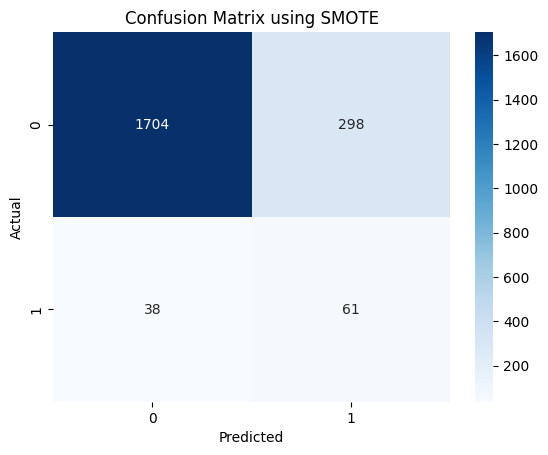

BorderlineSMOTE


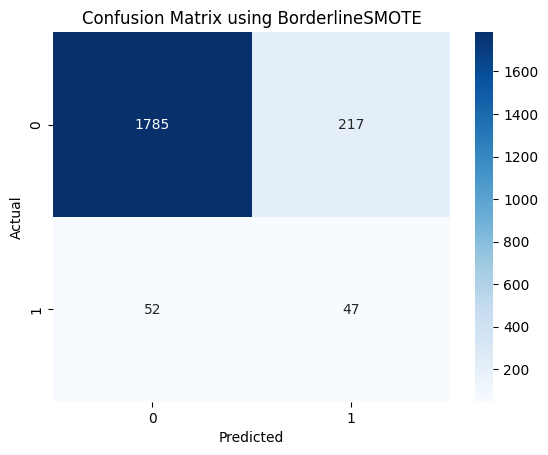

ADASYN


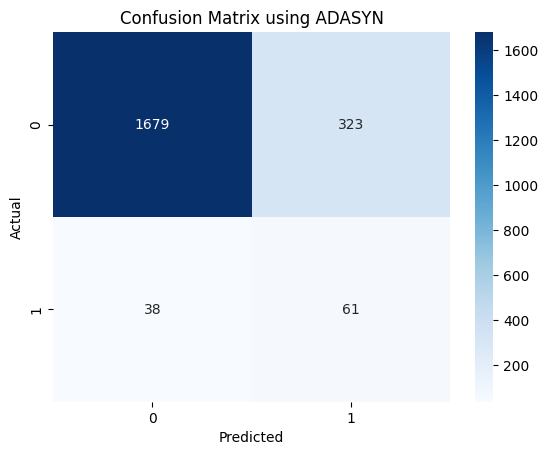

SVMSMOTE


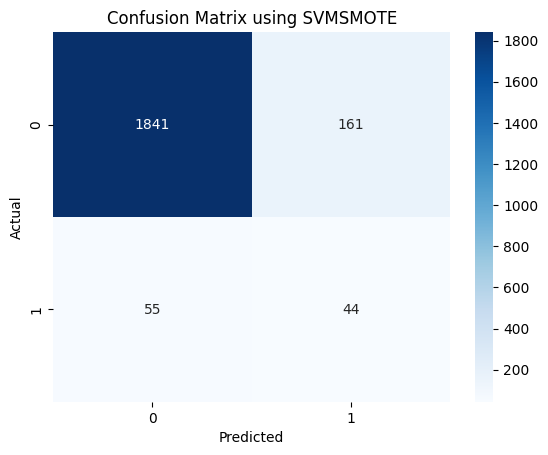

SMOTEENN


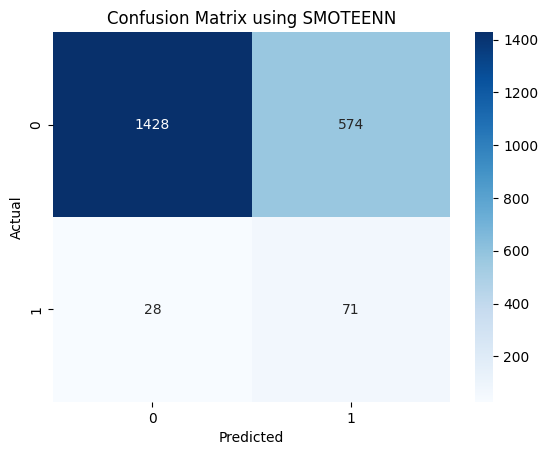

SMOTETomek


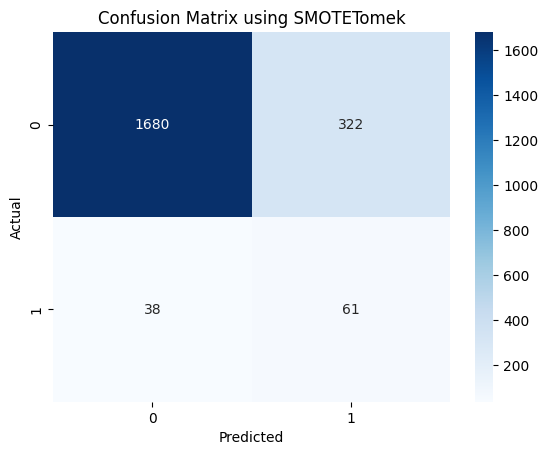

In [ ]:
#confusion matrix plot
for x in cm_rf:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

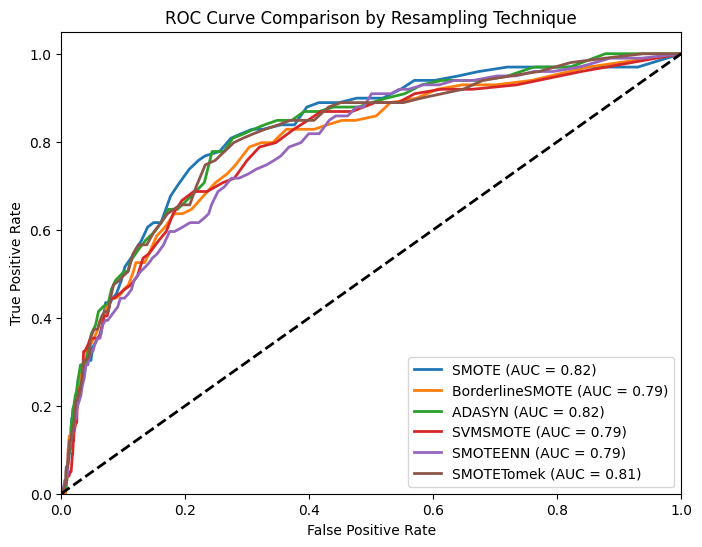

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_xgb = []
cm_xgb=[]
roc_xgb = {}
shap_values_xgb = []


for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:

        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = XGBClassifier(eval_metric='logloss',
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.1).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_xgb.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_xgb.append({name:shap_values})

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")



Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_xgb = pd.DataFrame(results_xgb)

# Round for readability
results_df_xgb = results_df_xgb.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.6246,0.1029,0.8993,0.6109,0.1847,0.8441
1,BorderlineSMOTE,0.6826,0.1135,0.8389,0.6749,0.2000,0.8432
2,ADASYN,0.6258,0.1002,0.8658,0.6139,0.1795,0.8483
3,SVMSMOTE,0.7271,0.1270,0.8121,0.7229,0.2196,0.8509
4,SMOTEENN,0.6004,0.0967,0.8926,0.5859,0.1744,0.8521
5,SMOTETomek,0.6214,0.1003,0.8792,0.6086,0.1801,0.8459


SMOTE


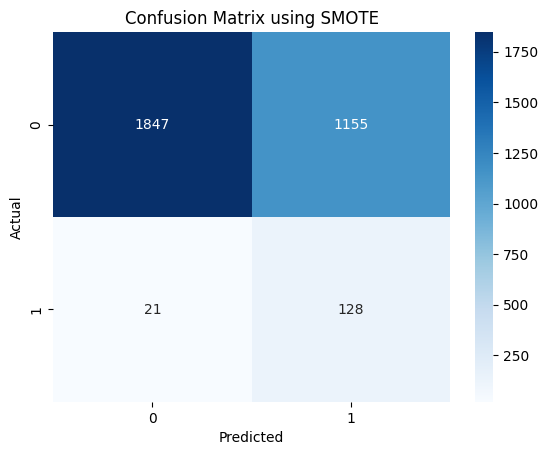

BorderlineSMOTE


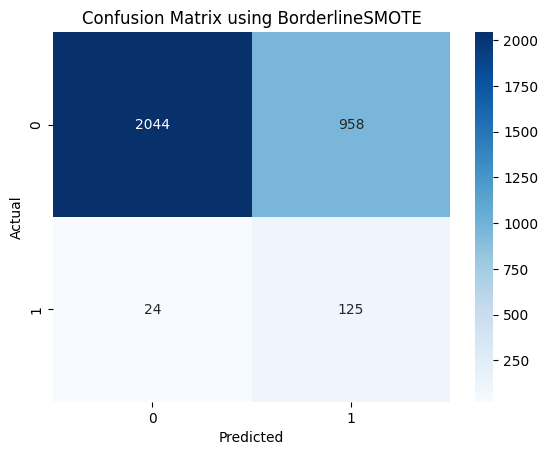

ADASYN


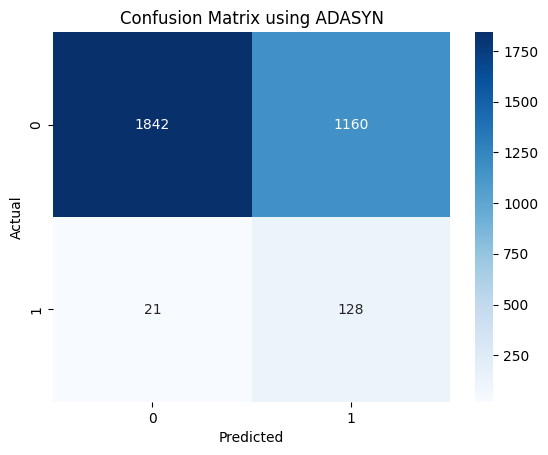

SVMSMOTE


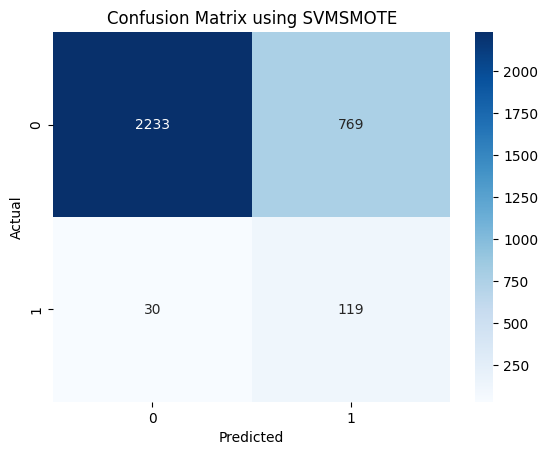

SMOTEENN


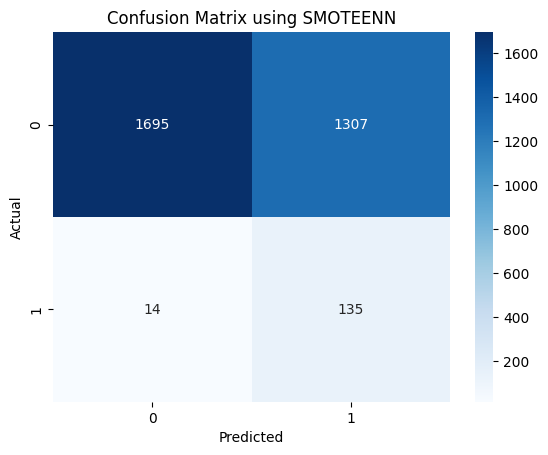

SMOTETomek


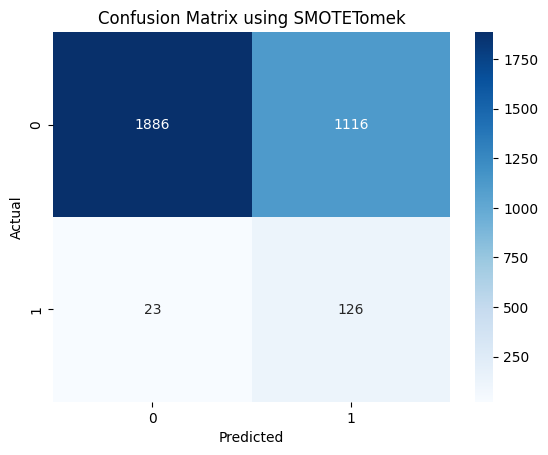

In [ ]:
#confusion matrix plot
for x in cm_xgb:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

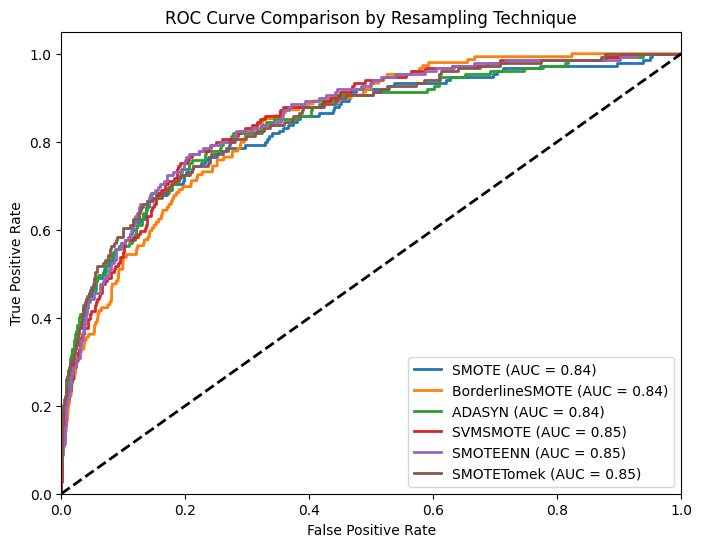

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

SMOTE


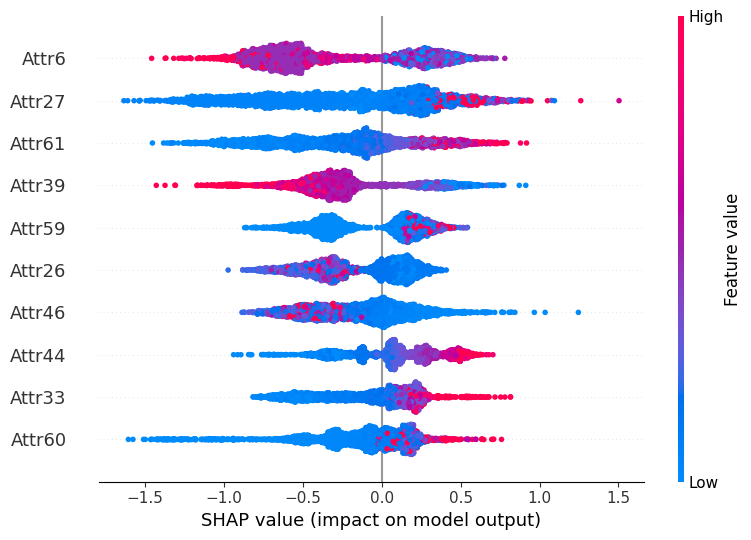

BorderlineSMOTE


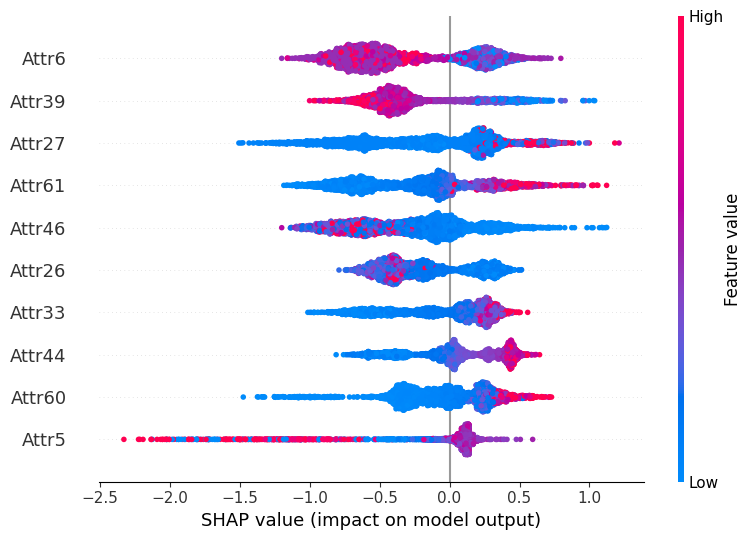

ADASYN


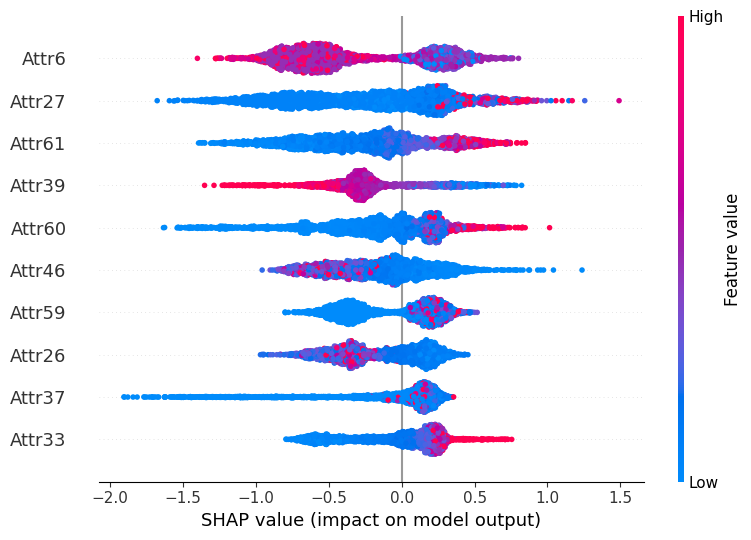

SVMSMOTE


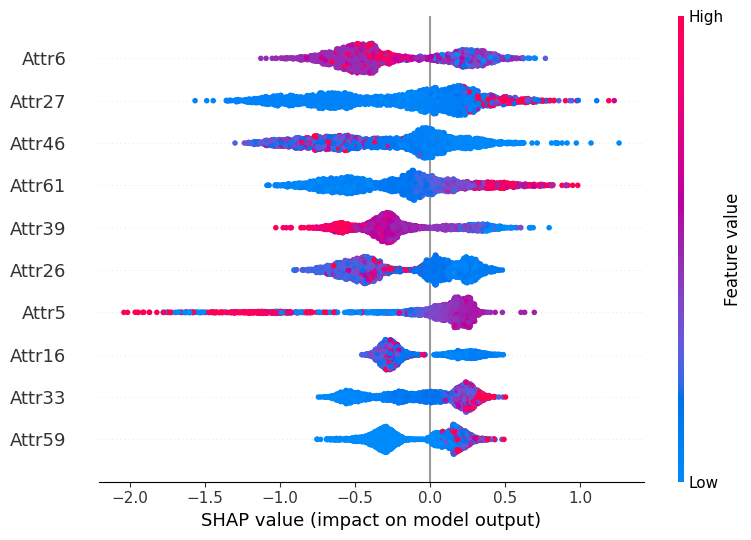

SMOTEENN


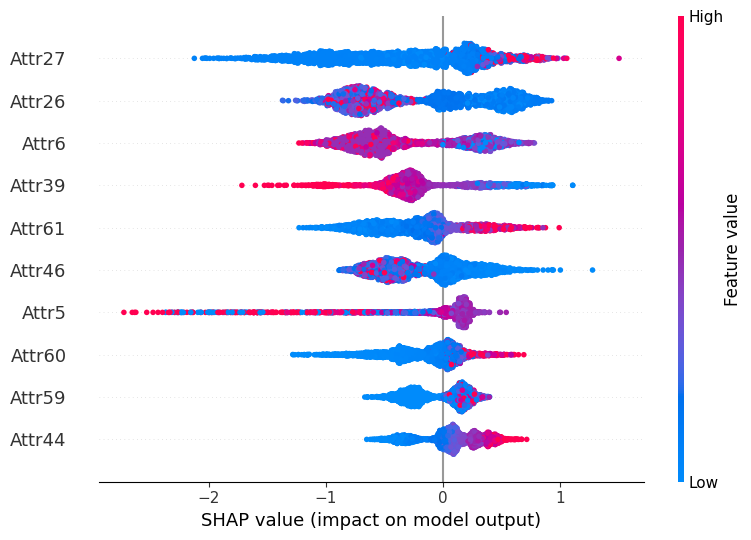

SMOTETomek


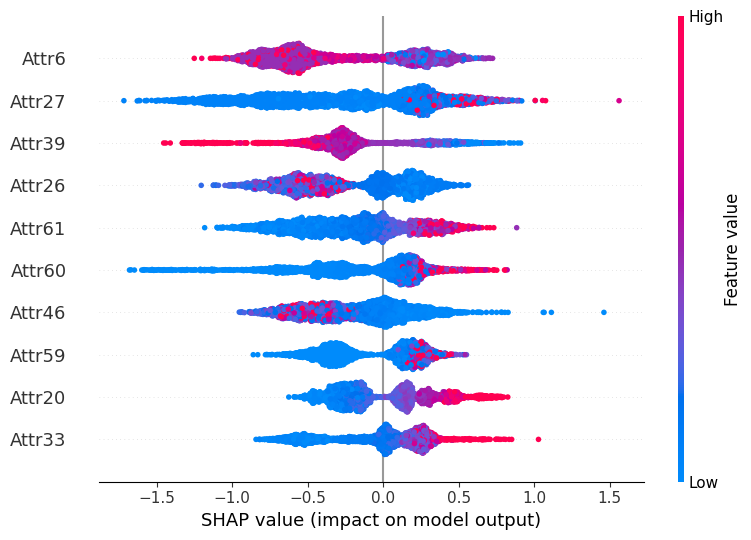

In [ ]:
for x in shap_values_xgb:
    for k in x:
        print(k)
    shap.summary_plot(x[k], X_test, max_display=10)



**ANN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l2


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_ann = []
cm_ann=[]
roc_ann = {}
shap_values_ann = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

        model = Sequential([
              Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
              BatchNormalization(),
              Dropout(0.5),
              Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Dropout(0.3),
              Dense(1, activation='sigmoid')])

        bankrupt_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        optimizer = Adam(learning_rate=0.0001, clipvalue=0.5)
        model.compile(
             optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['Recall', 'Precision'])


        y_prob = model.predict(X_test_scaled).flatten()
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_ann.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_ann.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_ann[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")


Using SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTE completed

Using BorderlineSMOTE...
 1/66 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ BorderlineSMOTE completed

Using ADASYN...
 1/66 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ ADASYN completed

Using SVMSMOTE...
 1/66 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SVMSMOTE completed

Using SMOTEENN...
 1/66 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTEENN completed

Using SMOTETomek...
 1/66 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_ann = pd.DataFrame(results_ann)

# Round for readability
results_df_ann = results_df_ann.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_ann)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.7663,0.0900,0.4343,0.7827,0.1490,0.6642
1,BorderlineSMOTE,0.0495,0.0472,1.0000,0.0025,0.0902,0.4011
2,ADASYN,0.4783,0.0569,0.6465,0.4700,0.1046,0.5215
3,SVMSMOTE,0.5236,0.0543,0.5556,0.5220,0.0990,0.5201
4,SMOTEENN,0.0519,0.0473,1.0000,0.0050,0.0904,0.4165
5,SMOTETomek,0.0495,0.0472,1.0000,0.0025,0.0902,0.3923


SMOTE


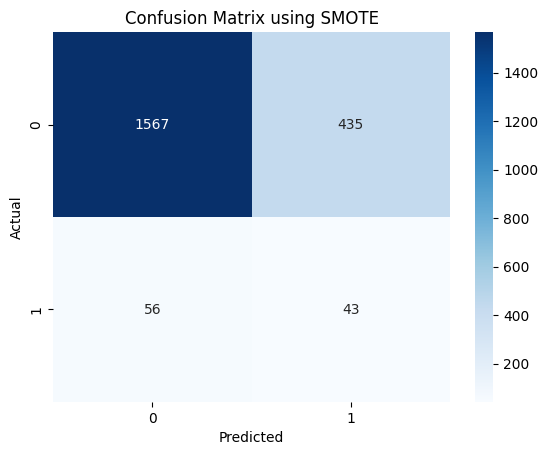

BorderlineSMOTE


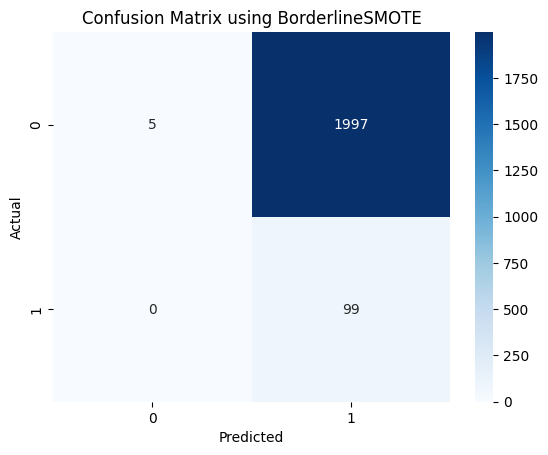

ADASYN


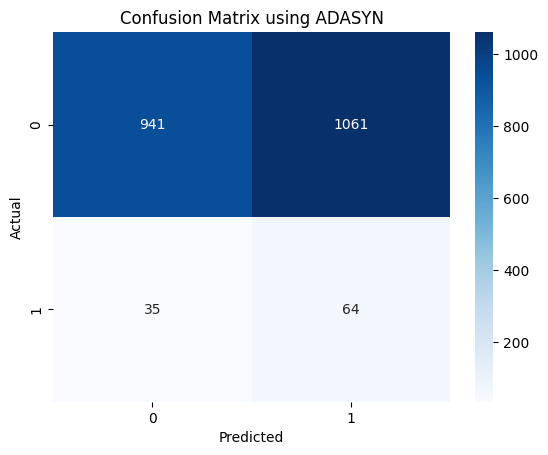

SVMSMOTE


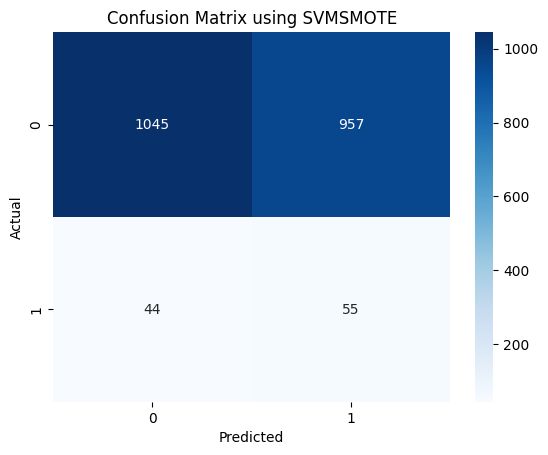

SMOTEENN


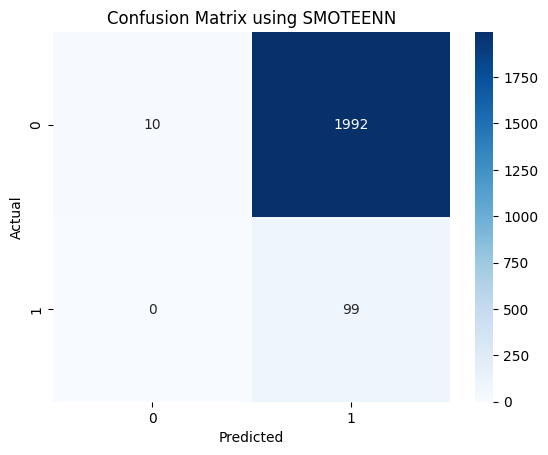

SMOTETomek


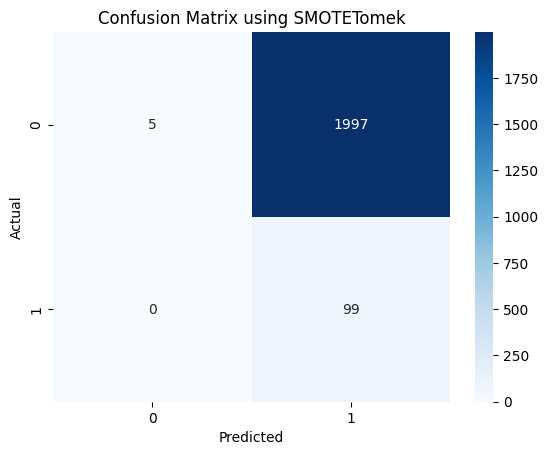

In [ ]:
#confusion matrix plot
for x in cm_ann:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

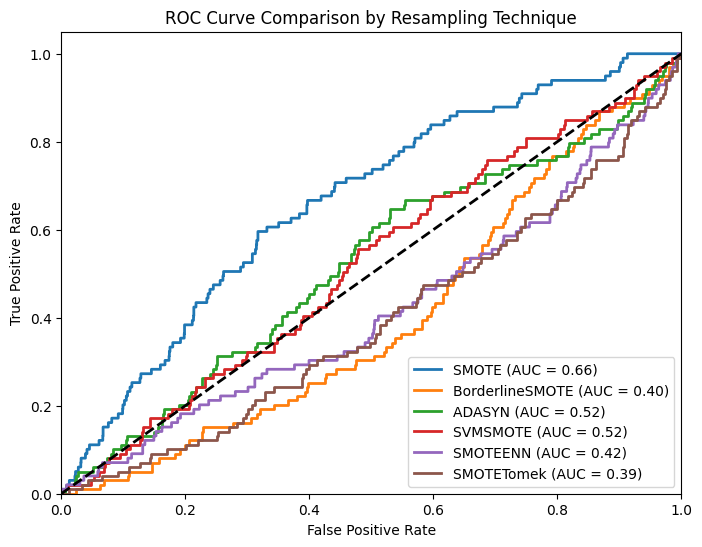

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_ann.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**MLP (6 Layers)**

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_mlp = []
cm_mlp=[]
roc_mlp = {}
shap_values_mlp = []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X1_resampled, y1_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # Define a 6-layer MLP
        model = Sequential([
            Dense(128, activation='relu', input_dim=X1_resampled.shape[1]),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X1_resampled, y1_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_mlp.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_mlp.append({name:cm})

         # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_mlp[name] = (fpr, tpr, roc_auc_score(y_test, y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_mlp.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Create DataFrame
results_df_mlp= pd.DataFrame(results_mlp)

# Round for readability
results_df_mlp = results_df_mlp.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_mlp)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8539,0.1486,0.4444,0.8741,0.2228,0.7525
1,BorderlineSMOTE,0.7454,0.1007,0.5556,0.7547,0.1705,0.7310
2,ADASYN,0.6116,0.0855,0.7475,0.6049,0.1535,0.7322
3,SVMSMOTE,0.9162,0.2016,0.2626,0.9486,0.2281,0.7352
4,SMOTEENN,0.7877,0.1119,0.5051,0.8017,0.1832,0.7250
5,SMOTETomek,0.8710,0.1587,0.4040,0.8941,0.2279,0.7192


SMOTE


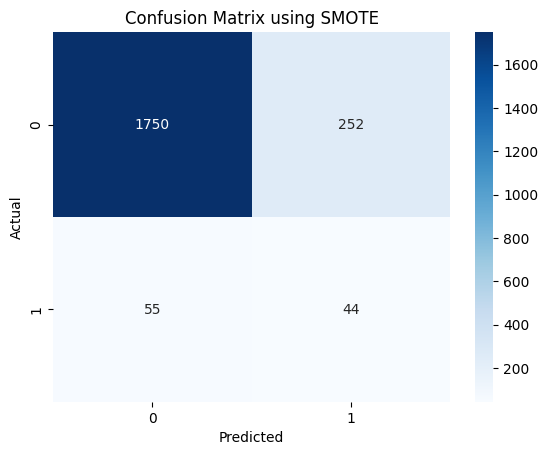

BorderlineSMOTE


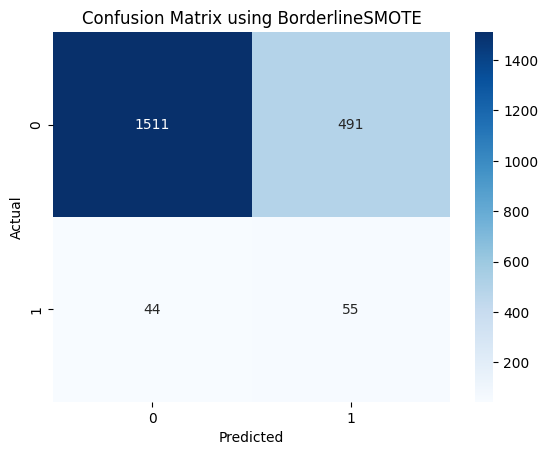

ADASYN


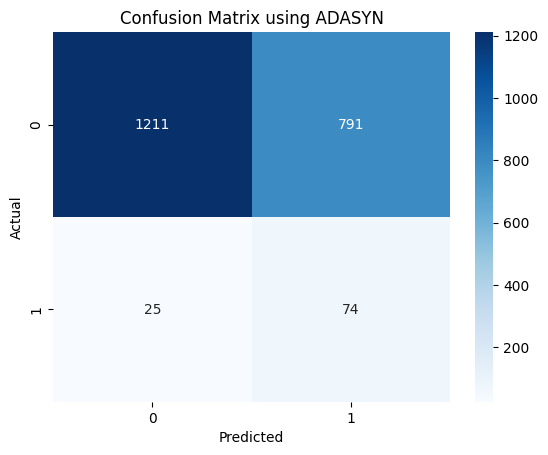

SVMSMOTE


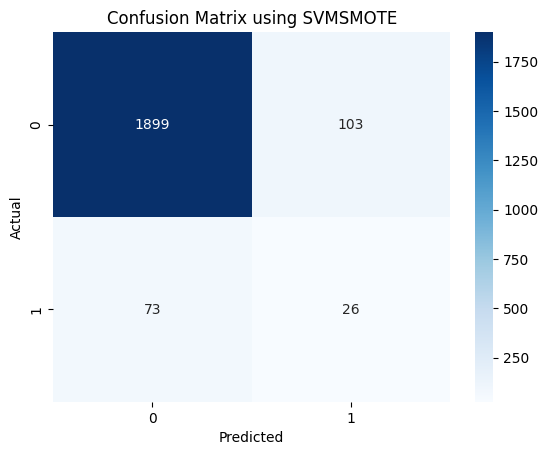

SMOTEENN


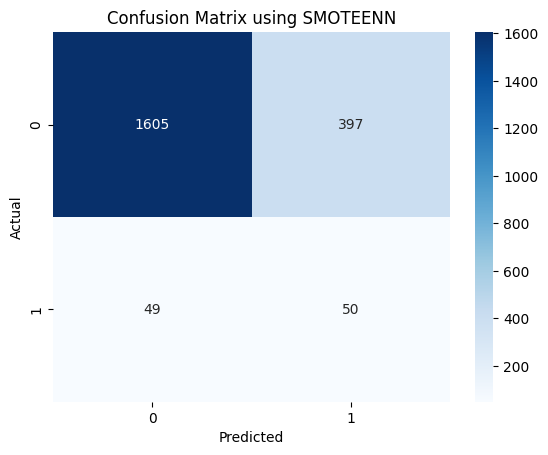

SMOTETomek


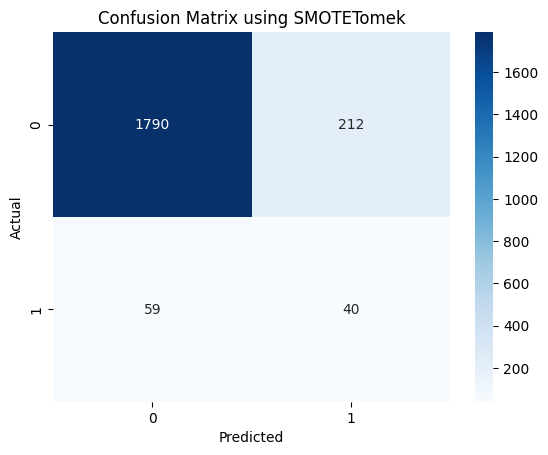

In [ ]:
#confusion matrix plot
for x in cm_mlp:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

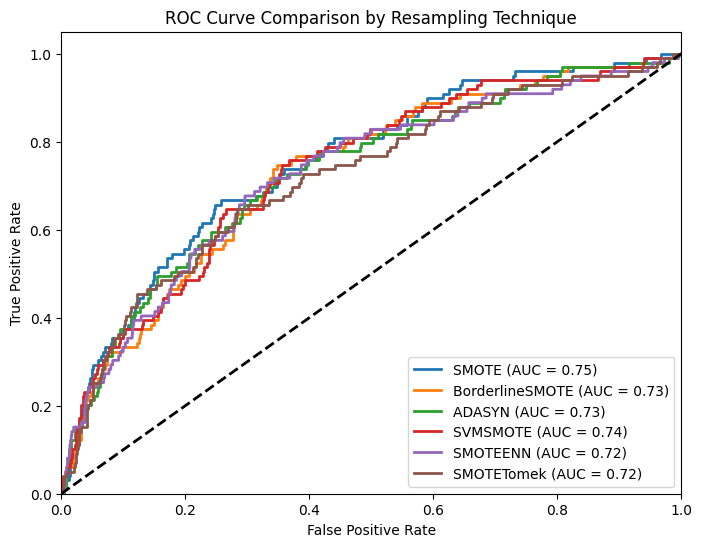

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_mlp.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**CNN**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn = []
cm_cnn=[]
roc_cnn = {}
shap_values_cnn = []


for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # 1D CNN
        model = Sequential([
              Conv1D(filters=64, kernel_size=3, activation='relu',
                     input_shape=(X_train.shape[1], 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.4),

                     Conv1D(filters=128, kernel_size=2, activation='relu'),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.3),

                     Flatten(),

                     Dense(64, activation='relu'),
                     BatchNormalization(),
                     Dropout(0.3),

                    Dense(1, activation='sigmoid')])

        model.compile( optimizer=Adam(learning_rate=0.0005),
                      loss='binary_crossentropy',
                      metrics=['Recall', 'Precision'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X_resampled, y_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_cnn.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
        roc_cnn[name] = (fpr, tpr, roc_auc_score(y_test,  y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_cnn.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
# Create DataFrame
results_df_cnn= pd.DataFrame(results_cnn)

# Round for readability
results_df_cnn = results_df_cnn.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.6692,0.1037,0.7879,0.6633,0.1833,0.7811
1,BorderlineSMOTE,0.7582,0.1192,0.6465,0.7637,0.2013,0.7670
2,ADASYN,0.7192,0.1122,0.7172,0.7193,0.1940,0.7726
3,SVMSMOTE,0.8425,0.1527,0.5152,0.8586,0.2356,0.7691
4,SMOTEENN,0.5964,0.0880,0.8081,0.5859,0.1587,0.7817
5,SMOTETomek,0.5812,0.0868,0.8283,0.5689,0.1571,0.7716


SMOTE


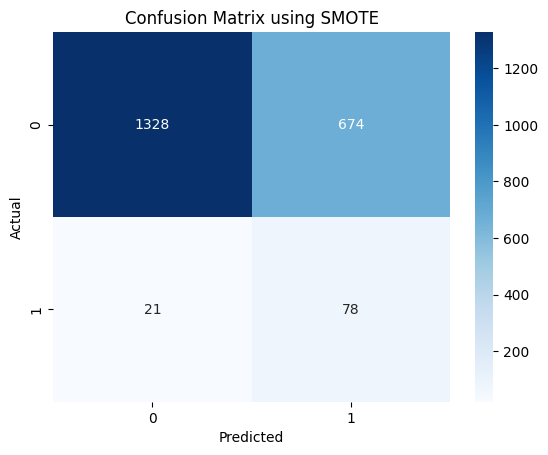

BorderlineSMOTE


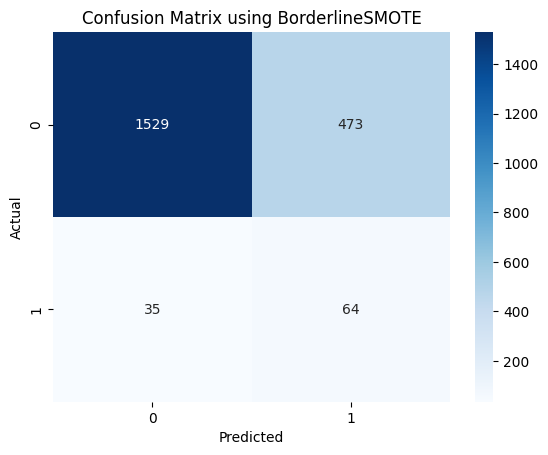

ADASYN


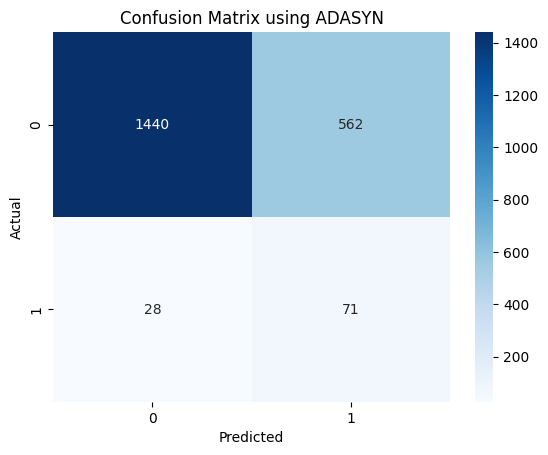

SVMSMOTE


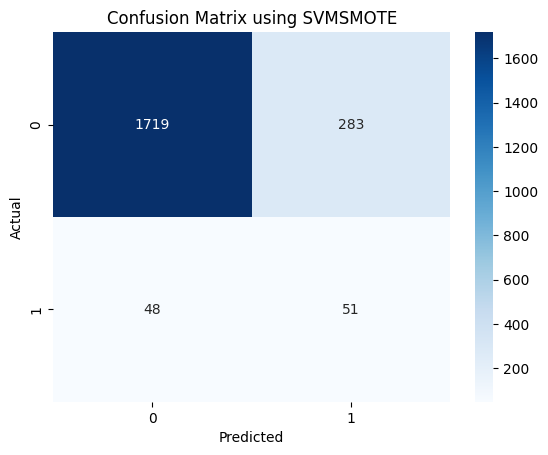

SMOTEENN


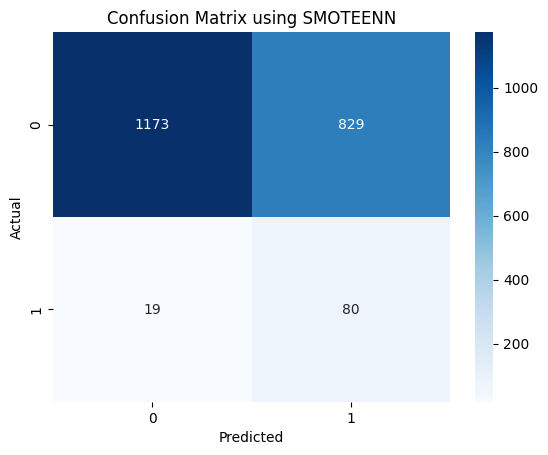

SMOTETomek


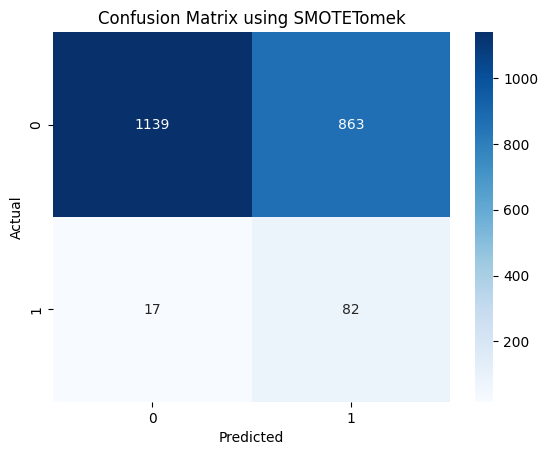

In [ ]:
#confusion matrix plot
for x in cm_cnn:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

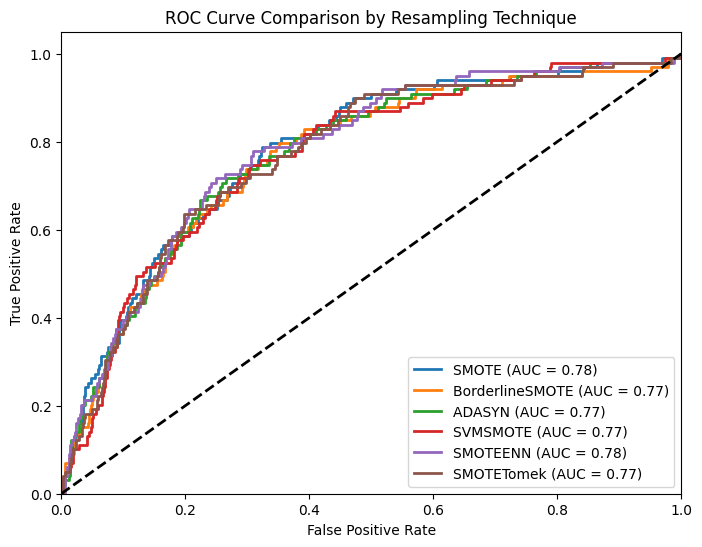

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_cnn.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()